In [563]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd



In [564]:
import json

with open("/N/project/berkeley_walking/BerkeleyData/berkeley_json/s6_13_rocks_allWalks.json", "r") as f:
    data = json.load(f)
with open("/N/project/berkeley_walking/BerkeleyData/berkeley_json/s6_13_rocks_allWalks.json", "w") as f:
    json.dump(data,f)

In [565]:
data.keys()

dict_keys(['ww', 'splitWalks_date', 'walkType', 'eyes', 'frames', 'sessionID', 'takeID', 'subID', 'shadowMarkerNames', 'processData_date', 'framerate', 'legLength', 'calibDist', 'px2mmScale', 'rVorCalibErr', 'comXYZ', 'isThisVORCalibrationData', 'rGazeGroundIntersection', 'rEyeballCenterXYZ', 'rGazeXYZ', 'headVecX_fr_xyz', 'headVecY_fr_xyz', 'headVecZ_fr_xyz', 'shadow_fr_mar_dim', 'rHeelXYZ', 'rToeXYZ', 'rFootXYZ', 'lHeelXYZ', 'lToeXYZ', 'lFootXYZ', 'hTopXYZ', 'headXYZ', 'hCenXYZ', 'steps_HS_TO_StanceLeg_XYZ', 'syncedUnixTime', 'gaze_norm_pos_x', 'gaze_norm_pos_y', 'worldFrameIndex', 'headGlobalQuat_wxyz', 'rEye_theta', 'rEye_phi', 'rEye_norm_pos_x', 'rEye_norm_pos_y', 'rEye_circle_3d_radius', 'rEye_blinks', 'sesh', 'rCorrAlignTheta', 'corrAlignTheta'])

In [566]:
frames = np.array(data['frames'])
time = np.array(data['syncedUnixTime'])
time = time -time[0]


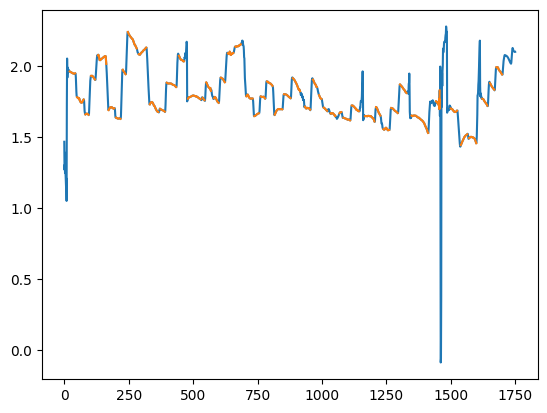

In [567]:
fixation = np.array(data['rEye_blinks'], dtype = bool)
theta = np.array(data['rEye_theta'])
phi = np.array(data['rEye_phi'])
theta_fix = np.array(data['rEye_theta'])
theta_fix[fixation] = np.nan


plt.plot(theta)
plt.plot(theta_fix)

In [568]:
fixations_df = pd.DataFrame({ 'Frames': frames, 'Time': time, 'Theta': theta,
                             'ThetaFix': theta_fix})

fixations_df = fixations_df.dropna()
fixations_df['TimeDiff'] = fixations_df['Time'].diff()

In [589]:
FixStartTime = fixations_df.loc[fixations_df['TimeDiff'] > 0.009]


In [570]:
framerate = data['framerate']

In [571]:
steps = np.array(data['steps_HS_TO_StanceLeg_XYZ']) #frame step start, frame step end, left/right, XYZ
step_start = steps[:,0].astype(int)
step_start_time = step_start / framerate

step_end = steps[:,1].astype(int)
step_end_time = step_end / framerate

step_frames = steps[:,0:2].astype(int)
step_time = step_frames.T / framerate


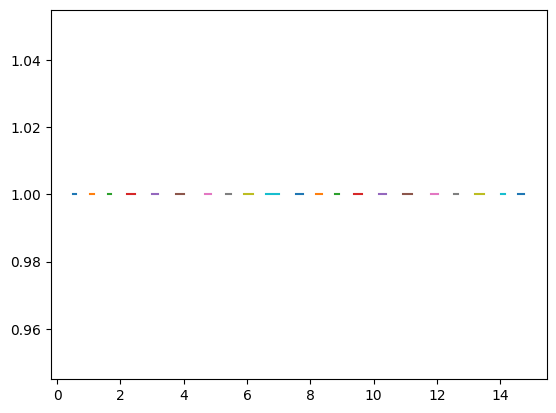

In [572]:
plt.plot(step_time , np.ones_like(step_time))

In [573]:
steps[0:8,2]

array([1., 2., 1., 2., 1., 2., 1., 2.])

In [574]:
steps_df = pd.DataFrame({'FrameStart': steps[:,0], 'FrameEnd': steps[:,1], 'Foot':steps[:,2],
                         'X': steps[:,3],  'Y': steps[:,4],  'Z' :steps[:,5]})

In [575]:
steps_df['StartTime'] = step_start_time
steps_df['EndTime'] = step_end_time


In [576]:
right_foot = steps_df.loc[(steps_df['Foot'] == 2)]
left_foot = steps_df.loc[(steps_df['Foot'] == 1)]

In [577]:
steps_df

,FrameStart,FrameEnd,Foot,X,Y,Z,StartTime,EndTime
0,61.0,72.0,1.0,602.567386,61228.392951,-536.771864,0.508333,0.600000
1,126.0,140.0,2.0,1009.394706,61257.477636,-725.070812,1.050000,1.166667
2,193.0,206.0,1.0,1340.793231,61303.269175,-919.221970,1.608333,1.716667
3,265.0,294.0,2.0,1914.279838,61340.069846,-833.833392,2.208333,2.450000
4,358.0,382.0,1.0,2389.280245,61439.272979,-737.859645,2.983333,3.183333
5,449.0,480.0,2.0,2717.168452,61547.277345,-424.638171,3.741667,4.000000
6,559.0,583.0,1.0,3187.877338,61508.095008,-175.235270,4.658333,4.858333
7,641.0,658.0,2.0,3654.226013,61481.358973,42.407246,5.341667,5.483333
8,710.0,744.0,1.0,3980.532982,61557.270114,181.715627,5.916667,6.200000
9,793.0,841.0,2.0,4138.123394,61577.994625,303.356519,6.608333,7.008333


(0.0, 1.6)

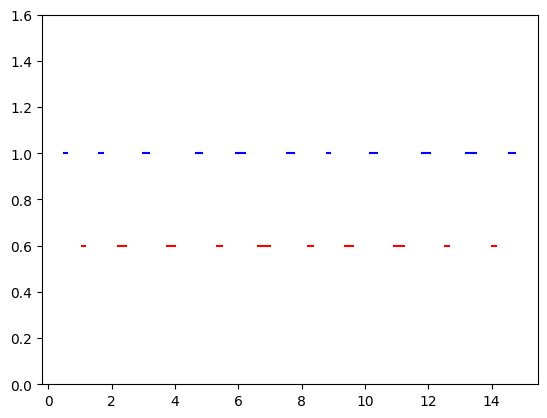

In [578]:
plt.plot((left_foot['StartTime'],left_foot['EndTime']), np.ones_like((left_foot['StartTime'],left_foot['EndTime'])), color = 'blue')
plt.plot((right_foot['StartTime'],right_foot['EndTime']), np.full_like((right_foot['StartTime'],right_foot['EndTime']),
                                                                            0.6, dtype=float), color = 'red')
plt.ylim(0,1.6)   